In [1]:
import skie
import numpy as np
import pandas as pd
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


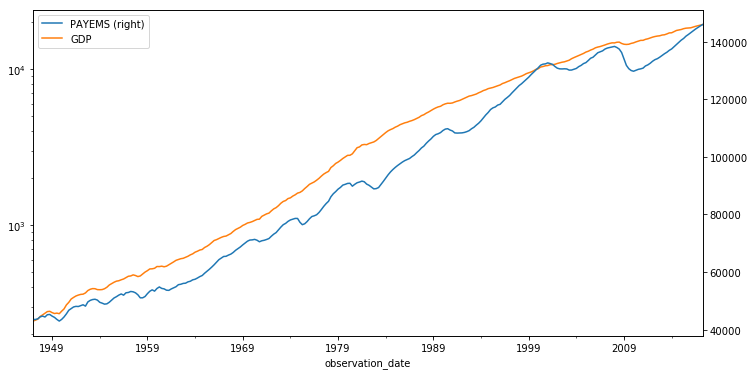

In [2]:
filename1='GDP.xls'
filename2='PAYEMS.xls'
gdp_df = pd.read_excel(filename1, header=10, index_col=0)
payems_df = pd.read_excel(filename2, header=10, index_col=0)
gdp_df = payems_df.join(gdp_df).dropna()
gdp_df.plot(logy=True, figsize=(12, 6), secondary_y="PAYEMS")

IT Index: 3.58


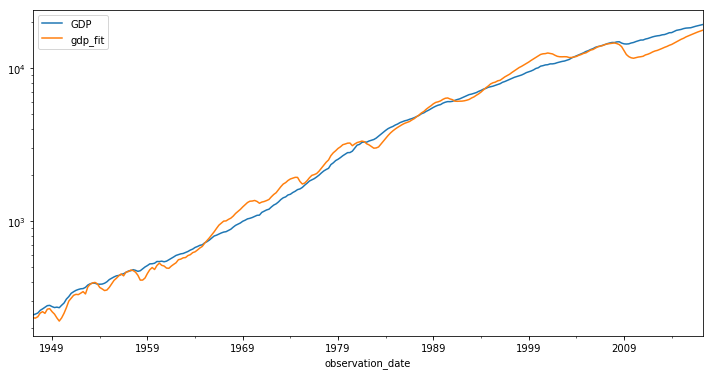

In [3]:
gdp_gie = skie.GeneralIE().fit(gdp_df.PAYEMS, gdp_df.GDP, log=True)
gdp_df['gdp_fit'] = gdp_gie.predict(gdp_df.PAYEMS)
gdp_df[['GDP','gdp_fit']].plot(logy=True, figsize=(12, 6))
print("IT Index: " + str(np.round(gdp_gie.k,2)))

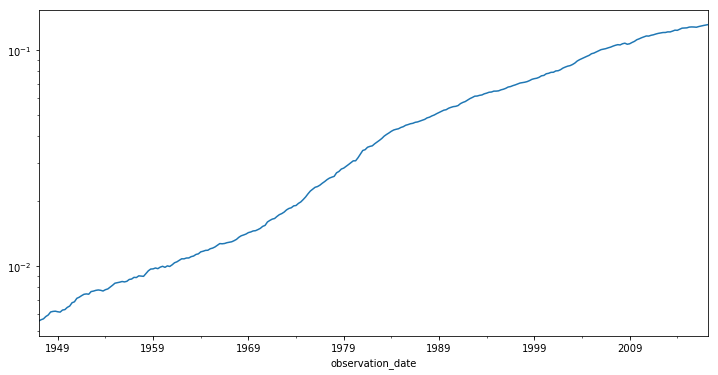

In [4]:
gdp_df['gdp_payems']=gdp_df.GDP/gdp_df.PAYEMS
gdp_df['gdp_payems'].plot(figsize=(12,6), logy=True)

In [5]:
gdp_rt = skie.RelTime(base=min(gdp_df.index))
gdp_df['date'] = gdp_rt.transform(gdp_df.index)

gdp_log_linear = skie.LogLinearEntropyMin().fit(gdp_df.gdp_payems, gdp_df.date, n_bins=50, alpha_delta=0.1)
gdp_df['gdp_payems_loglinear'] = gdp_log_linear.transform(gdp_df.gdp_payems)
print("Alpha: " + str(np.round(gdp_log_linear.alpha*100,2)))

Alpha: 3.33


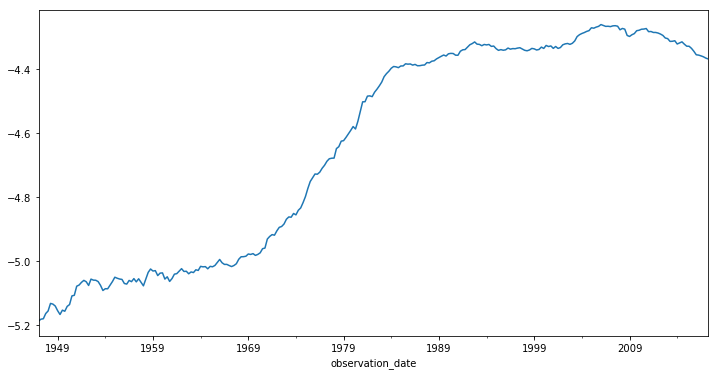

In [6]:
gdp_df['gdp_payems_loglinear'].plot(figsize=(12,6))

Transition Centres:
1977-02-03 08:07:21.734400
2015-05-23 17:30:09.792000
Shock Width:
-4.46
0.74
Shock Magnitude:
1.0
0.0


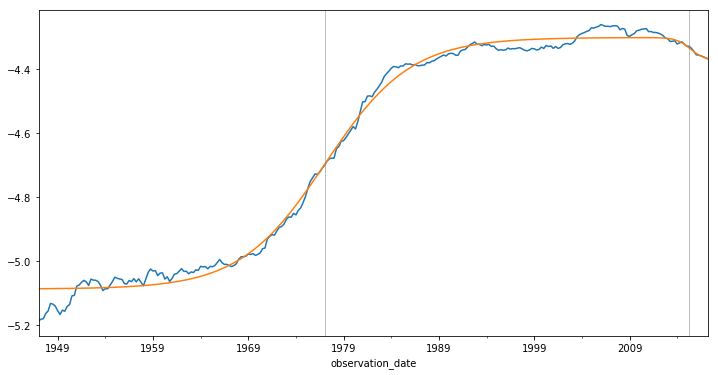

In [7]:
guesses = list()
guesses.append([1.0,-1.0, gdp_rt.transform("1977-1-1")])
guesses.append([0.1,0.1, gdp_rt.transform("2014-1-1")])
gdp_payems_die = skie.DynamicIE()
gdp_payems_die.fit(gdp_df.date, gdp_df.gdp_payems_loglinear.apply(np.exp), guess_c = 0.1, guesses=guesses, eq=False)
gdp_df["gdp_payems_loglinear_fit"] = np.log(gdp_payems_die.predict(gdp_df.date, gdp_df.gdp_payems_loglinear.apply(np.exp)))

gdp_df["gdp_payems_loglinear"].plot(figsize=(12,6))
gdp_df["gdp_payems_loglinear_fit"].plot(figsize=(12,6))

print("Transition Centres:")
for t in gdp_payems_die.results['transition']:
    time = gdp_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in gdp_payems_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in gdp_payems_die.results['magnitude']:
    print(np.round(m))

Transition Centres:
1977-02-03 08:07:21.734400
2015-05-23 17:30:09.792000
Shock Width:
-4.46
0.74
Shock Magnitude:
1.0
0.0


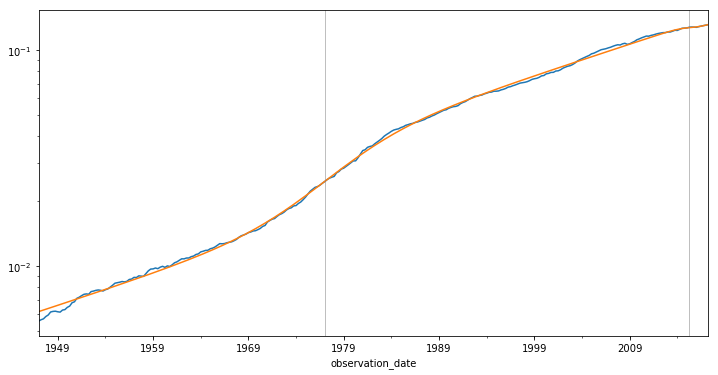

In [8]:
gdp_df.gdp_payems.plot(figsize=(12,6))
gdp_log_linear.inverse_transform(gdp_df['gdp_payems_loglinear_fit']).plot(logy=True)

print("Transition Centres:")
for t in gdp_payems_die.results['transition']:
    time = gdp_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in gdp_payems_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in gdp_payems_die.results['magnitude']:
    print(np.round(m))

Transition Centres:
1977-02-20 07:09:56.707199999
2017-04-01 00:00:00
Shock Width:
-2.78
3.13
Shock Magnitude:
1.0
0.0


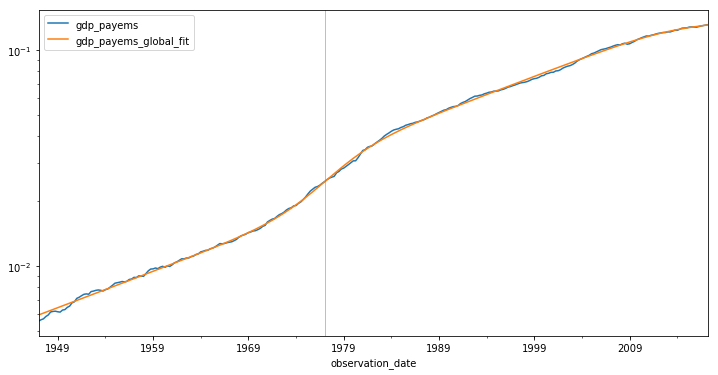

In [9]:
guesses = list()
guesses.append([1.0,-1.0, gdp_rt.transform(pd.to_datetime("1970-1-1"))])
guesses.append([0.1,0.1, gdp_rt.transform(pd.to_datetime("2000-1-1"))])

gdp_payems_global_die = skie.DynamicIE().fit(gdp_df.date, gdp_df.gdp_payems, guess_alpha = 0.04, guess_c=0.0, guesses=guesses, eq=True)
gdp_df['gdp_payems_global_fit'] = gdp_payems_global_die.predict(gdp_df.date, gdp_df.gdp_payems)
gdp_df[['gdp_payems','gdp_payems_global_fit']].plot(figsize=(12,6), logy=True)

print("Transition Centres:")
for t in gdp_payems_global_die.results['transition']:
    time = gdp_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in gdp_payems_global_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in gdp_payems_global_die.results['magnitude']:
    print(np.round(m))